In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# Load CIFAR-100 data
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 4s 0us/step


In [ ]:
# Preprocess CIFAR-100 data
x_train = tf.image.resize(x_train, (224, 224))  # Resize to match EfficientNet input size
x_test = tf.image.resize(x_test, (224, 224))
x_train = tf.keras.applications.efficientnet.preprocess_input(x_train)
x_test = tf.keras.applications.efficientnet.preprocess_input(x_test)

In [ ]:
# Load pre-trained EfficientNetB0 model without top layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
# Add new top layers for CIFAR-100 classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)

In [ ]:
# Combine base model with new top layers
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=5,
          validation_data=(x_test, y_test),
          verbose=True)

Epoch 1/5
391/391 [==============================] - 83s 211ms/step - loss: 0.1381 - accuracy: 0.9588 - val_loss: 1.2459 - val_accuracy: 0.7270
Epoch 2/5
391/391 [==============================] - 82s 211ms/step - loss: 0.1173 - accuracy: 0.9660 - val_loss: 1.2504 - val_accuracy: 0.7312
Epoch 3/5
391/391 [==============================] - 82s 211ms/step - loss: 0.1149 - accuracy: 0.9661 - val_loss: 1.2826 - val_accuracy: 0.7261
Epoch 4/5
391/391 [==============================] - 83s 211ms/step - loss: 0.1188 - accuracy: 0.9646 - val_loss: 1.2931 - val_accuracy: 0.7295
Epoch 5/5
391/391 [==============================] - 83s 211ms/step - loss: 0.1179 - accuracy: 0.9649 - val_loss: 1.2994 - val_accuracy: 0.7329


In [ ]:
# Save model in JSON format into file
model_json = model.to_json()
open('cifar100_architecture0.json', 'w').write(model_json)

#save the trained weights
model.save_weights('cifar100_weights0.h5', overwrite=True)

print('Files saved for model definition and for weights.')

Files saved for model definition and for weights.


79/79 [==============================] - 14s 173ms/step - loss: 1.2994 - accuracy: 0.7329

Test score/loss: 1.2994474172592163
Test accuracy: 0.7329000234603882


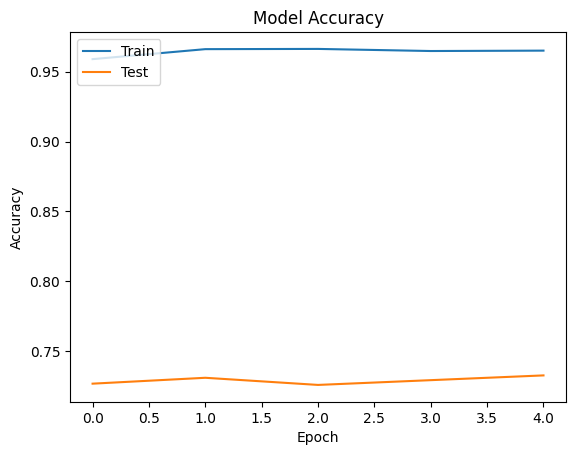

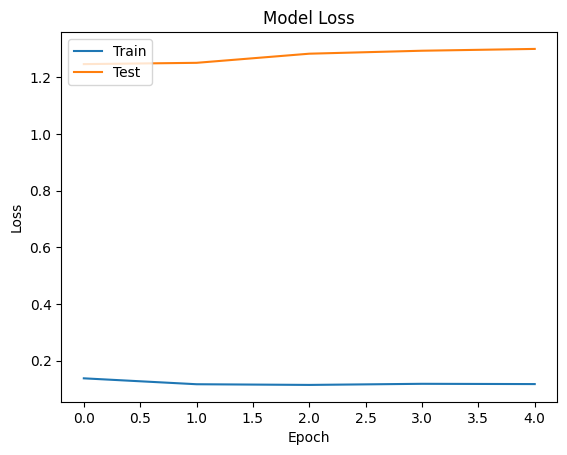

In [ ]:
import matplotlib.pyplot as plt

# Testing
score = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# Summarise history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarise history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
          batch_size=64,
          epochs=10,
          validation_data=(x_test, y_test),
          verbose=True)

Epoch 1/10
782/782 [==============================] - 84s 100ms/step - loss: 0.5146 - accuracy: 0.8431 - val_loss: 0.9392 - val_accuracy: 0.7326
Epoch 2/10
782/782 [==============================] - 77s 98ms/step - loss: 0.4521 - accuracy: 0.8630 - val_loss: 0.9416 - val_accuracy: 0.7336
Epoch 3/10
782/782 [==============================] - 77s 98ms/step - loss: 0.4054 - accuracy: 0.8786 - val_loss: 0.9522 - val_accuracy: 0.7362
Epoch 4/10
782/782 [==============================] - 77s 98ms/step - loss: 0.3649 - accuracy: 0.8904 - val_loss: 0.9677 - val_accuracy: 0.7335
Epoch 5/10
782/782 [==============================] - 77s 98ms/step - loss: 0.3314 - accuracy: 0.9016 - val_loss: 0.9652 - val_accuracy: 0.7393
Epoch 6/10
782/782 [==============================] - 77s 98ms/step - loss: 0.2986 - accuracy: 0.9104 - val_loss: 0.9883 - val_accuracy: 0.7347
Epoch 7/10
782/782 [==============================] - 77s 99ms/step - loss: 0.2743 - accuracy: 0.9203 - val_loss: 0.9965 - val_accuracy

157/157 [==============================] - 13s 81ms/step - loss: 1.0561 - accuracy: 0.7375

Test score/loss: 1.0561273097991943
Test accuracy: 0.737500011920929


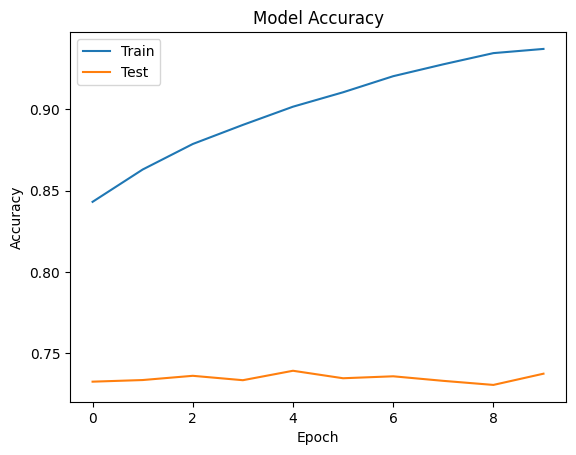

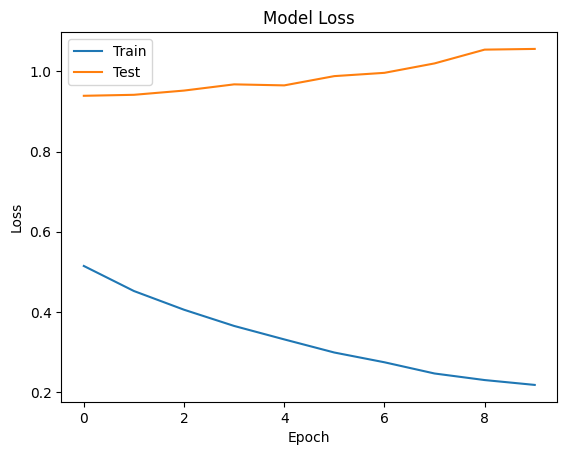

In [ ]:
import matplotlib.pyplot as plt

# Testing
score = model.evaluate(x_test, y_test, batch_size=64, verbose=1)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# Summarise history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarise history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
          batch_size=64,
          epochs=5,
          validation_data=(x_test, y_test),
          verbose=True)

Epoch 1/5
782/782 [==============================] - 85s 100ms/step - loss: 0.2995 - accuracy: 0.9044 - val_loss: 1.1619 - val_accuracy: 0.7166
Epoch 2/5
782/782 [==============================] - 77s 98ms/step - loss: 0.2728 - accuracy: 0.9123 - val_loss: 1.2163 - val_accuracy: 0.7183
Epoch 3/5
782/782 [==============================] - 77s 98ms/step - loss: 0.2534 - accuracy: 0.9196 - val_loss: 1.2596 - val_accuracy: 0.7144
Epoch 4/5
782/782 [==============================] - 77s 98ms/step - loss: 0.2362 - accuracy: 0.9240 - val_loss: 1.2807 - val_accuracy: 0.7172
Epoch 5/5
782/782 [==============================] - 77s 98ms/step - loss: 0.2160 - accuracy: 0.9307 - val_loss: 1.2970 - val_accuracy: 0.7211


157/157 [==============================] - 13s 82ms/step - loss: 1.2970 - accuracy: 0.7211

Test score/loss: 1.296987533569336
Test accuracy: 0.7210999727249146


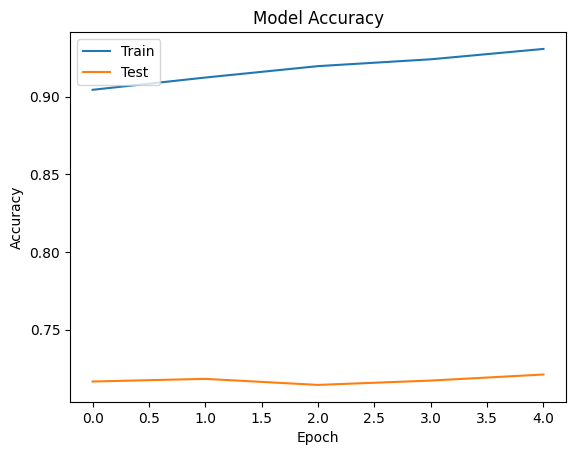

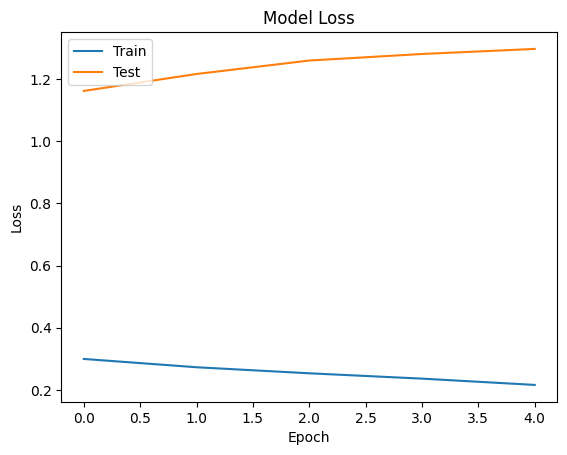

In [ ]:
import matplotlib.pyplot as plt

# Testing
score = model.evaluate(x_test, y_test, batch_size=64, verbose=1)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# Summarise history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarise history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

BADAJGUPAEIFTJAEFJ

In [ ]:
from tensorflow.keras.regularizers import l2

# Define the model with L2 regularization
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False

# Add L2 regularization to the dense layers
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(100, activation='softmax', kernel_regularizer=l2(0.01)))

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
          batch_size=64,
          epochs=10,
          validation_data=(x_test, y_test),
          verbose=True)

AttributeError: 'Functional' object has no attribute 'add'

157/157 [==============================] - 13s 82ms/step - loss: 1.3016 - accuracy: 0.7302

Test score/loss: 1.3015742301940918
Test accuracy: 0.7301999926567078


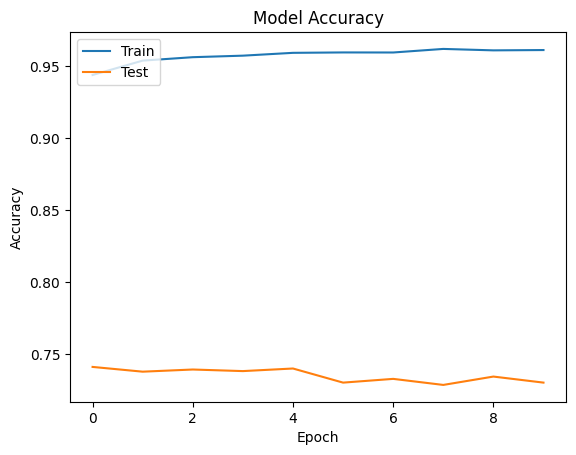

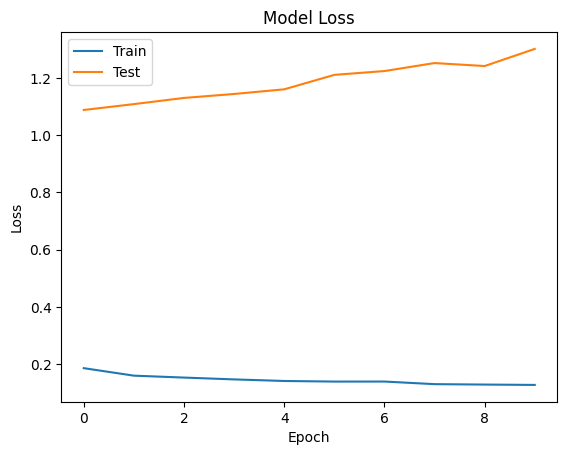

In [ ]:
import matplotlib.pyplot as plt

# Testing
score = model.evaluate(x_test, y_test, batch_size=64, verbose=1)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# Summarise history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarise history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    steps_per_epoch=len(x_train) // 64,
                    epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
 12/781 [..............................] - ETA: 7:49 - loss: 0.8883 - accuracy: 0.0156

KeyboardInterrupt: 

In [ ]:
import os

# Print the current working directory
# print(os.getcwd())

# List the contents of the /content/ directory
# print(os.listdir('/content/'))

# Read the contents of the model architecture JSON file
with open('/content/cifar100_architecture0.json', 'r') as file:
    model_architecture = file.read()

# Split the string into lines
architecture_lines = model_architecture.splitlines()

In [ ]:
# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = False

In [ ]:
# Recompile the model after unfreezing layers
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fine-tune the model
history2 = model.fit(x_train, y_train,
          batch_size=64,
          epochs=10,
          validation_data=(x_test, y_test),
          verbose=True)

Epoch 1/10
782/782 [==============================] - 88s 102ms/step - loss: 0.3087 - accuracy: 0.9035 - val_loss: 1.2541 - val_accuracy: 0.7204
Epoch 2/10
782/782 [==============================] - 79s 101ms/step - loss: 0.2290 - accuracy: 0.9280 - val_loss: 1.2074 - val_accuracy: 0.7280
Epoch 3/10
782/782 [==============================] - 79s 101ms/step - loss: 0.2104 - accuracy: 0.9346 - val_loss: 1.1849 - val_accuracy: 0.7321
Epoch 4/10
782/782 [==============================] - 79s 101ms/step - loss: 0.1890 - accuracy: 0.9415 - val_loss: 1.1674 - val_accuracy: 0.7347
Epoch 5/10
782/782 [==============================] - 78s 100ms/step - loss: 0.1821 - accuracy: 0.9449 - val_loss: 1.1530 - val_accuracy: 0.7352
Epoch 6/10
782/782 [==============================] - 78s 100ms/step - loss: 0.1695 - accuracy: 0.9483 - val_loss: 1.1476 - val_accuracy: 0.7373
Epoch 7/10
782/782 [==============================] - 78s 100ms/step - loss: 0.1609 - accuracy: 0.9528 - val_loss: 1.1406 - val_ac

157/157 [==============================] - 15s 81ms/step - loss: 1.1282 - accuracy: 0.7405

Test score/loss: 1.1282413005828857
Test accuracy: 0.7404999732971191


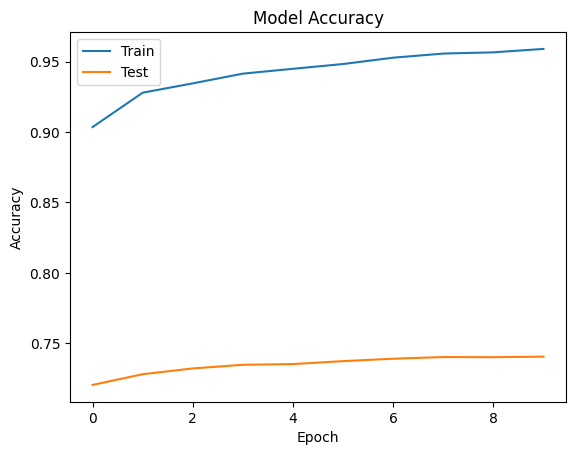

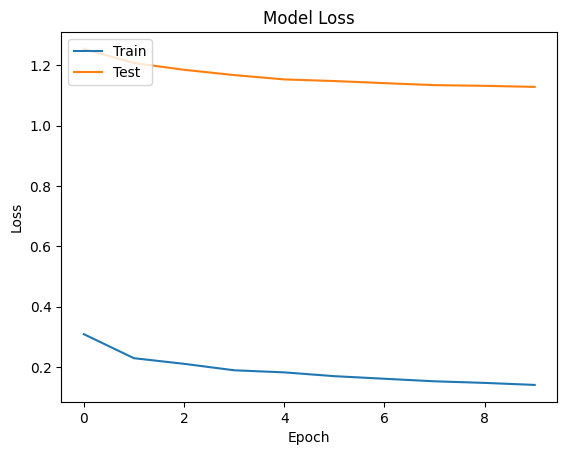

In [ ]:
# Testing
score = model.evaluate(x_test, y_test, batch_size=64, verbose=1)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# Summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Recompile the model after unfreezing layers
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fine-tune the model
history3 = model.fit(x_train, y_train,
          batch_size=64,
          epochs=20,
          validation_data=(x_test, y_test),
          verbose=True)

Epoch 1/20
782/782 [==============================] - 87s 102ms/step - loss: 0.3410 - accuracy: 0.8885 - val_loss: 1.1897 - val_accuracy: 0.7252
Epoch 2/20
782/782 [==============================] - 78s 100ms/step - loss: 0.2413 - accuracy: 0.9217 - val_loss: 1.1511 - val_accuracy: 0.7356
Epoch 3/20
782/782 [==============================] - 78s 100ms/step - loss: 0.2004 - accuracy: 0.9351 - val_loss: 1.1941 - val_accuracy: 0.7328
Epoch 4/20
782/782 [==============================] - 78s 100ms/step - loss: 0.1778 - accuracy: 0.9425 - val_loss: 1.1946 - val_accuracy: 0.7397
Epoch 5/20
782/782 [==============================] - 78s 100ms/step - loss: 0.1529 - accuracy: 0.9503 - val_loss: 1.2642 - val_accuracy: 0.7356
Epoch 6/20
782/782 [==============================] - 78s 100ms/step - loss: 0.1437 - accuracy: 0.9553 - val_loss: 1.2193 - val_accuracy: 0.7407
Epoch 7/20
782/782 [==============================] - 78s 100ms/step - loss: 0.1329 - accuracy: 0.9579 - val_loss: 1.1979 - val_ac

157/157 [==============================] - 13s 82ms/step - loss: 1.3497 - accuracy: 0.7456

Test score/loss: 1.3497289419174194
Test accuracy: 0.7455999851226807


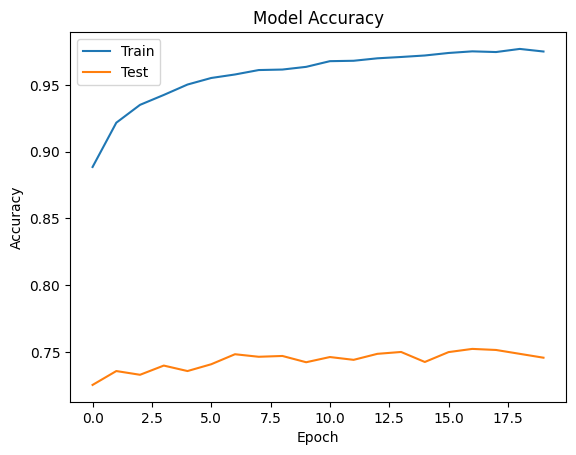

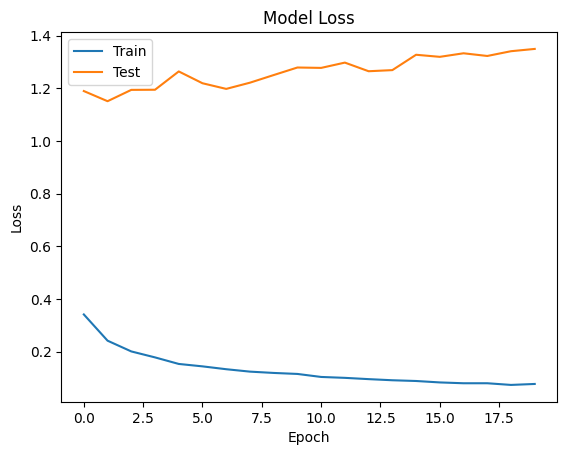

In [ ]:
# Testing
score = model.evaluate(x_test, y_test, batch_size=64, verbose=1)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])

# Summarize history for accuracy
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

'oiha;jafwefiu